In [1]:
# Tensorflow
import numpy as np
import pandas as pd
import glob
import imageio
import matplotlib.pyplot as plt
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization, Dense, LeakyReLU
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import time
from IPython import display
from scipy.signal import savgol_filter
from sklearn.model_selection import train_test_split

2024-11-19 23:09:59.957257: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-19 23:10:00.119725: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732032600.176484  130480 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732032600.193267  130480 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-19 23:10:00.463805: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Data

In [2]:
data = pd.read_csv("/home/sonn/Sonn/Workspace/Projects/GANSpectralDataAugmentation/data/UV_Vis_NuocCam_ChuaDaoHam.csv")

In [3]:
data.head()

,TenMau,DiaPhuong,NamLayMau,Giong,1000,995,990,985,980,975,...,300,295,290,285,280,275,270,265,260,255
0,BG.23.Vinh.01,Bắc Giang,2023,Vinh,0.672,0.670,0.667,0.666,0.664,0.663,...,1.787,1.860,1.948,2.032,2.091,2.121,2.134,2.144,2.157,2.182
1,BG.23.Vinh.02,Bắc Giang,2023,Vinh,1.219,1.221,1.221,1.221,1.220,1.219,...,2.295,2.370,2.462,2.551,2.611,2.627,2.608,2.567,2.516,2.479
2,BG.23.Vinh.04,Bắc Giang,2023,Vinh,1.241,1.240,1.240,1.240,1.237,1.235,...,2.647,2.717,2.815,2.932,3.064,3.208,3.375,3.583,3.848,4.157
3,BG.23.Vinh.05,Bắc Giang,2023,Vinh,1.297,1.298,1.300,1.301,1.300,1.301,...,2.417,2.479,2.559,2.641,2.714,2.773,2.828,2.889,2.955,3.024
4,BG.23.Vinh.07,Bắc Giang,2023,Vinh,1.311,1.312,1.314,1.312,1.310,1.307,...,2.428,2.516,2.631,2.755,2.858,2.922,2.950,2.951,2.939,2.934


In [4]:
y = data['DiaPhuong']

In [5]:
X = data.iloc[:, 4:]

(0.0, 149.0)

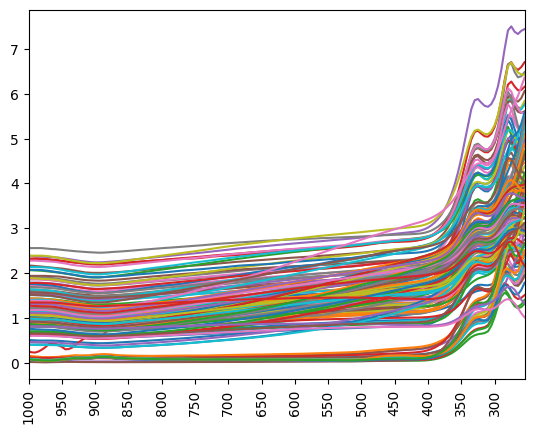

In [6]:
plt.plot(X.T)
plt.xticks(X.columns[::10], rotation=90)
plt.xlim(X.columns[0], X.columns[-1])

In [7]:
X = savgol_filter(X, window_length=5, polyorder=2, deriv=1)

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(-20.0, 0, '−20'),
  Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120'),
  Text(140.0, 0, '140'),
  Text(160.0, 0, '160')])

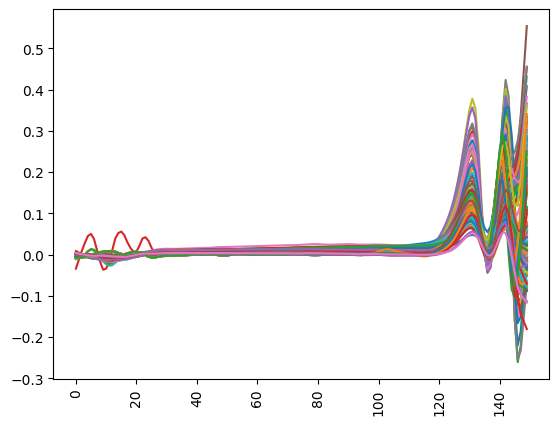

In [8]:
plt.plot(X.T)
plt.xticks(rotation=90)

In [9]:
X[y == 'Bắc Giang']

array([[-2.57142857e-03, -2.28571429e-03, -2.00000000e-03, ...,
         1.45000000e-02,  1.83571429e-02,  2.22142857e-02],
       [ 1.91428571e-03,  1.05714286e-03,  2.00000000e-04, ...,
        -3.88000000e-02, -4.53714286e-02, -5.19428571e-02],
       [ 3.42857143e-04, -2.28571429e-04, -8.00000000e-04, ...,
         2.37100000e-01,  2.85814286e-01,  3.34528571e-01],
       ...,
       [ 2.65714286e-03,  1.22857143e-03, -2.00000000e-04, ...,
         1.30000000e-03, -9.98571429e-03, -2.12714286e-02],
       [ 3.08571429e-03,  1.94285714e-03,  8.00000000e-04, ...,
         5.81000000e-02,  6.31000000e-02,  6.81000000e-02],
       [ 2.08571429e-03,  9.42857143e-04, -2.00000000e-04, ...,
        -7.08000000e-02, -6.96571429e-02, -6.85142857e-02]])

In [10]:
X.shape

(147, 150)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((117, 150), (30, 150), (117,), (30,))

In [12]:
# X_der = X_der.reshape(X_der.shape[0], X_der.shape[1], 1)

In [13]:
# X_der.shape

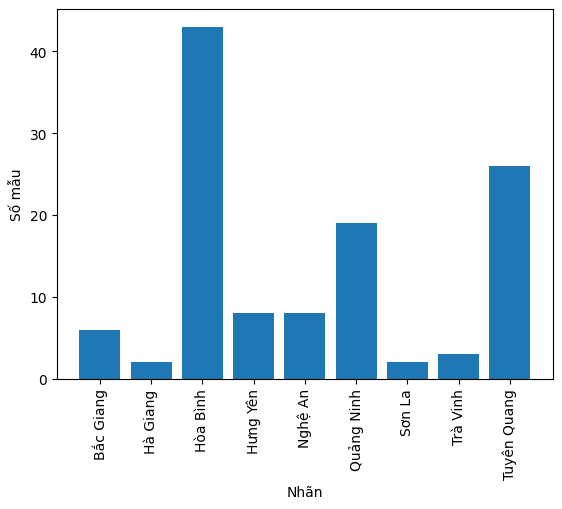

In [14]:
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts)
plt.xlabel('Nhãn')
plt.xticks(rotation=90)
plt.ylabel('Số mẫu')
plt.show()

In [15]:
X_train.shape

(117, 150)

In [16]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [17]:
X_train.shape

(117, 150, 1)

In [ ]:
noise_dim = 100
length = X_train.shape[1]
feature_dim = X_train.shape[1]


In [19]:
feature_dim

150

Model

In [ ]:
LENGTH = length
BATCH_SIZE = 8
EPOCHS = 100
Z_DIM = noise_dim

In [ ]:
def make_generator_model():
    gen = Sequential()
    
    gen.add(layers.Input((Z_DIM,)))
    gen.add(layers.Dense(LENGTH * 6))
    gen.add(layers.Reshape((LENGTH // 6, 6 * 6)))
    
    gen.add(create_gen_block(125,2))
    gen.add(create_gen_block3(75, 5))
    gen.add(create_gen_block2(25, 7))
    
    gen.add(layers.Conv1D(1, 3, activation='tanh', padding='same'))
    gen.add(layers.Flatten())
    
    return gen

def create_gen_block(hidden, kernel):
    block = Sequential()
    
    block.add(layers.Conv1DTranspose(hidden, kernel, strides=1, padding='same'))
    block.add(layers.ReLU())
    block.add(layers.BatchNormalization())

    return block

def create_gen_block2(hidden, kernel):
    block = Sequential()
    
    block.add(layers.Conv1DTranspose(hidden, kernel, strides=2, padding='same'))
    block.add(layers.ReLU())
    block.add(layers.BatchNormalization())

    
    return block

def create_gen_block3(hidden, kernel):
    block = Sequential()
    
    block.add(layers.Conv1DTranspose(hidden, kernel, strides=3, padding='same'))
    block.add(layers.ReLU())
    block.add(layers.BatchNormalization())

    
    return block


In [24]:
generator = make_generator_model()
generator.summary()

I0000 00:00:1732032603.935941  130480 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1221 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2050, pci bus id: 0000:01:00.0, compute capability: 8.6


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 900)            │        90,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 25, 36)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 25, 125)        │         9,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_2 (Sequential)       │ (None, 75, 75)         │        47,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_3 (Sequential)       │ (None, 150, 25)        │        13,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 150, 1)         │            76 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 150)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161,101 (629.30 KB)

 Trainable params: 160,651 (627.54 KB)

 Non-trainable params: 450 (1.76 KB)

I0000 00:00:1732032605.280011  130480 cuda_dnn.cc:529] Loaded cuDNN version 90300


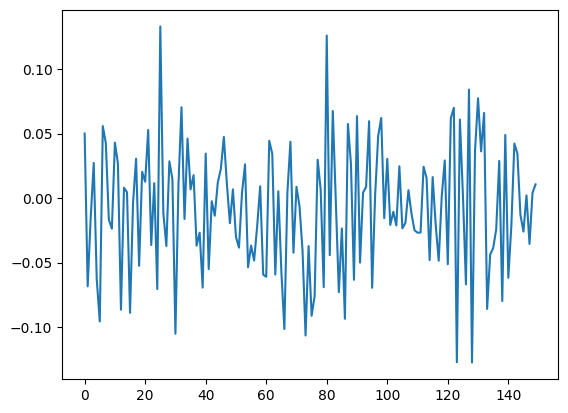

In [25]:
noise = tf.random.normal([1, noise_dim])
generated_data = generator(noise, training=False)
generated_data_ = generated_data.numpy().reshape(-1).tolist()
plt.plot(generated_data_)

In [26]:
generated_data.shape

TensorShape([1, 150])

In [27]:
def make_discriminator_model():
    
    model = tf.keras.Sequential()
    
    model.add(layers.Input(shape={feature_dim}))
    model.add(layers.Reshape([feature_dim, 1]))
    model.add(layers.Conv1D(kernel_size= 15, filters= 256, activation='leaky_relu'))  
    model.add(layers.MaxPool1D())
    model.add(layers.Dropout(0.2))                                                      
    
    model.add(layers.Conv1D(kernel_size= 15, filters= 128))   
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.01))
        
    model.add(layers.MaxPool1D())
    model.add(layers.Dropout(0.2))                                                     

    model.add(layers.Flatten())
    model.add(layers.Dense(64))                                                       
    model.add(layers.Dense(1))
    model.compile()
    
    return model

In [28]:
discriminator = make_discriminator_model()          
decision = discriminator(generated_data)            
print (decision)                                
discriminator.summary()

/home/sonn/anaconda3/envs/WSAIPython3.11/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


tf.Tensor([[-0.00161633]], shape=(1, 1), dtype=float32)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_1 (Reshape)             │ (None, 150, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 136, 256)       │         4,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 68, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 68, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 54, 128)        │       491,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 54, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 54, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 27, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 27, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3456)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │       221,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 717,569 (2.74 MB)

 Trainable params: 717,313 (2.74 MB)

 Non-trainable params: 256 (1.00 KB)

In [29]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    return cross_entropy(tf.ones_like(real_output), real_output) + cross_entropy(tf.zeros_like(fake_output), fake_output)


def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [30]:
seed = tf.random.normal([1, noise_dim])        

def generate_data(model, num_synthetic_to_gen=1):
  noise_input = tf.random.normal([num_synthetic_to_gen, noise_dim])
  predictions = model(noise_input, training=False)
  predictions = predictions.numpy()
  return predictions

def calc_accuracy(prediction):
  correct_predictions = tf.cast(prediction < 0.5, tf.float32)
  accuracy = tf.reduce_mean(correct_predictions)
  return accuracy

In [31]:
numofEPOCHS = 8000
BATCH_SIZE = 12 

In [36]:
def draw_training_evolution(model, epoch, noise_input= noise):
  predictions = model(noise_input, training=False)
  
  for i in range(predictions.shape[0]):
        fig = plt.figure()
        plt.plot(predictions[i].numpy().tolist())
        plt.savefig('../reports/ConvNetDisGANtraining2/image_at_epoch_{:04d}_{:04d}.png'.format(epoch, i))
        plt.close()

In [33]:

def train_step(data, generator, discriminator, generator_optimizer, discriminator_optimizer):
    noise = tf.random.normal([BATCH_SIZE, noise_dim], seed=42)

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_data = generator(noise, training=True)

      real_output = discriminator(data, training=True)
      fake_output = discriminator(generated_data, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)
      acc = calc_accuracy(fake_output)
     
        

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss, acc

def train(dataset, epochs, generator, discriminator, generator_optimizer, discriminator_optimizer):
  
  for epoch in range(epochs):
    start_time = time.time()

    gen_losses, disc_losses, accuracies = [], [], []

    for data_batch in dataset:
      gen_loss, disc_loss, acc = train_step(data_batch, generator, discriminator, generator_optimizer, discriminator_optimizer)
      accuracies.append(acc)
      gen_losses.append(gen_loss)
      disc_losses.append(disc_loss)

    epoch_gen_loss  = np.average(gen_losses)
    epoch_disc_loss = np.average(disc_losses)
    epoch_accuracy = np.average(accuracies)

    if (epoch + 1) % 100 == 0:
      draw_training_evolution(generator, epoch+1)
   
    print("Epoch: {}/{}".format(epoch+1, epochs))
    print("Generator Loss: {}, Discriminator Loss: {}".format(epoch_gen_loss, epoch_disc_loss))
    print("Accuracy: {}".format(epoch_accuracy))
    print(f"Epoch time: {(time.time() - start_time) * 1000}" )
        

In [37]:
for name in ['Bắc Giang']:
    X_tmp = X_train[y_train == name]
    generator = make_generator_model()
    discriminator = make_discriminator_model()
    generator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
    discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
    data_size = X_tmp.shape[0]        
    train_dataset = tf.data.Dataset.from_tensor_slices(X_tmp).shuffle(data_size).batch(BATCH_SIZE)  
    train(train_dataset, numofEPOCHS, generator, discriminator, generator_optimizer, discriminator_optimizer)
    generator.save(f"generator_{name}_epoch_{numofEPOCHS}.h5")

Epoch: 1/8000
Generator Loss: 1.2543445825576782, Discriminator Loss: 1.281296730041504
Accuracy: 0.8333333134651184
Epoch time: 163.85889053344727
Epoch: 2/8000
Generator Loss: 4.563483715057373, Discriminator Loss: 0.7635322213172913
Accuracy: 1.0
Epoch time: 118.18695068359375
Epoch: 3/8000
Generator Loss: 6.2495574951171875, Discriminator Loss: 0.6818680167198181
Accuracy: 1.0
Epoch time: 127.18319892883301
Epoch: 4/8000
Generator Loss: 7.408081531524658, Discriminator Loss: 0.6546916365623474
Accuracy: 1.0
Epoch time: 121.14739418029785
Epoch: 5/8000
Generator Loss: 7.701210021972656, Discriminator Loss: 0.6052559018135071
Accuracy: 1.0
Epoch time: 121.65713310241699
Epoch: 6/8000
Generator Loss: 7.898331165313721, Discriminator Loss: 0.5293445587158203
Accuracy: 1.0
Epoch time: 130.52058219909668
Epoch: 7/8000
Generator Loss: 6.95934534072876, Discriminator Loss: 0.4966036379337311
Accuracy: 1.0
Epoch time: 137.76874542236328
Epoch: 8/8000
Generator Loss: 7.439484119415283, Discr

2024-11-19 23:11:45.882820: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch: 29/8000
Generator Loss: 8.142582893371582, Discriminator Loss: 0.044632911682128906
Accuracy: 1.0
Epoch time: 128.31687927246094
Epoch: 30/8000
Generator Loss: 8.85905647277832, Discriminator Loss: 0.051383960992097855
Accuracy: 1.0
Epoch time: 158.67257118225098
Epoch: 31/8000
Generator Loss: 8.50967025756836, Discriminator Loss: 0.03831864893436432
Accuracy: 1.0
Epoch time: 127.54511833190918
Epoch: 32/8000
Generator Loss: 8.774524688720703, Discriminator Loss: 0.0396229587495327
Accuracy: 1.0
Epoch time: 124.92632865905762
Epoch: 33/8000
Generator Loss: 8.781847953796387, Discriminator Loss: 0.03624491021037102
Accuracy: 1.0
Epoch time: 124.3906021118164
Epoch: 34/8000
Generator Loss: 7.3779425621032715, Discriminator Loss: 0.058289121836423874
Accuracy: 1.0
Epoch time: 126.21164321899414
Epoch: 35/8000
Generator Loss: 11.211222648620605, Discriminator Loss: 0.0306440070271492
Accuracy: 1.0
Epoch time: 122.27773666381836
Epoch: 36/8000
Generator Loss: 9.7368745803833, Discrim

2024-11-19 23:12:01.416520: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch: 157/8000
Generator Loss: 10.73214054107666, Discriminator Loss: 0.00475469371303916
Accuracy: 1.0
Epoch time: 113.98863792419434
Epoch: 158/8000
Generator Loss: 13.934867858886719, Discriminator Loss: 0.0035391286946833134
Accuracy: 1.0
Epoch time: 117.00892448425293
Epoch: 159/8000
Generator Loss: 11.855430603027344, Discriminator Loss: 0.004597136750817299
Accuracy: 1.0
Epoch time: 122.64323234558105
Epoch: 160/8000
Generator Loss: 13.547995567321777, Discriminator Loss: 0.003719327738508582
Accuracy: 1.0
Epoch time: 112.64824867248535
Epoch: 161/8000
Generator Loss: 12.446968078613281, Discriminator Loss: 0.003573501715436578
Accuracy: 1.0
Epoch time: 119.4303035736084
Epoch: 162/8000
Generator Loss: 12.656879425048828, Discriminator Loss: 0.0038867518305778503
Accuracy: 1.0
Epoch time: 113.18564414978027
Epoch: 163/8000
Generator Loss: 14.193988800048828, Discriminator Loss: 0.0033557259012013674
Accuracy: 1.0
Epoch time: 119.84944343566895
Epoch: 164/8000
Generator Loss: 11

2024-11-19 23:12:32.002840: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch: 413/8000
Generator Loss: 14.740435600280762, Discriminator Loss: 0.0007651765481568873
Accuracy: 1.0
Epoch time: 116.57285690307617
Epoch: 414/8000
Generator Loss: 14.458789825439453, Discriminator Loss: 0.0005301837809383869
Accuracy: 1.0
Epoch time: 118.93439292907715
Epoch: 415/8000
Generator Loss: 14.655056953430176, Discriminator Loss: 0.0005533597432076931
Accuracy: 1.0
Epoch time: 117.97857284545898
Epoch: 416/8000
Generator Loss: 13.302708625793457, Discriminator Loss: 0.0008824271499179304
Accuracy: 1.0
Epoch time: 117.1417236328125
Epoch: 417/8000
Generator Loss: 13.485493659973145, Discriminator Loss: 0.0005524485604837537
Accuracy: 1.0
Epoch time: 115.966796875
Epoch: 418/8000
Generator Loss: 12.646758079528809, Discriminator Loss: 0.0007370467064902186
Accuracy: 1.0
Epoch time: 116.7154312133789
Epoch: 419/8000
Generator Loss: 14.465487480163574, Discriminator Loss: 0.0005542382714338601
Accuracy: 1.0
Epoch time: 115.31949043273926
Epoch: 420/8000
Generator Loss: 13

2024-11-19 23:13:32.416276: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch: 925/8000
Generator Loss: 11.889941215515137, Discriminator Loss: 0.005389752797782421
Accuracy: 1.0
Epoch time: 110.30983924865723
Epoch: 926/8000
Generator Loss: 9.68713665008545, Discriminator Loss: 0.004306382033973932
Accuracy: 1.0
Epoch time: 108.79969596862793
Epoch: 927/8000
Generator Loss: 4.4003729820251465, Discriminator Loss: 0.0775880515575409
Accuracy: 1.0
Epoch time: 116.20116233825684
Epoch: 928/8000
Generator Loss: 5.300800800323486, Discriminator Loss: 0.037396129220724106
Accuracy: 1.0
Epoch time: 122.22099304199219
Epoch: 929/8000
Generator Loss: 11.29682445526123, Discriminator Loss: 0.023320110514760017
Accuracy: 1.0
Epoch time: 116.43600463867188
Epoch: 930/8000
Generator Loss: 19.682186126708984, Discriminator Loss: 0.017051324248313904
Accuracy: 1.0
Epoch time: 118.20077896118164
Epoch: 931/8000
Generator Loss: 6.198832035064697, Discriminator Loss: 0.027428334578871727
Accuracy: 1.0
Epoch time: 117.36774444580078
Epoch: 932/8000
Generator Loss: 7.1648726

2024-11-19 23:15:33.012707: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch: 1949/8000
Generator Loss: 12.984931945800781, Discriminator Loss: 0.029488038271665573
Accuracy: 1.0
Epoch time: 114.70413208007812
Epoch: 1950/8000
Generator Loss: 7.3344902992248535, Discriminator Loss: 0.018619604408740997
Accuracy: 1.0
Epoch time: 116.38617515563965
Epoch: 1951/8000
Generator Loss: 9.121110916137695, Discriminator Loss: 0.012484616599977016
Accuracy: 1.0
Epoch time: 143.51749420166016
Epoch: 1952/8000
Generator Loss: 2.5183897018432617, Discriminator Loss: 0.20675672590732574
Accuracy: 1.0
Epoch time: 112.57243156433105
Epoch: 1953/8000
Generator Loss: 4.40690803527832, Discriminator Loss: 0.1136128157377243
Accuracy: 1.0
Epoch time: 121.35815620422363
Epoch: 1954/8000
Generator Loss: 17.375486373901367, Discriminator Loss: 0.1753813624382019
Accuracy: 1.0
Epoch time: 115.93794822692871
Epoch: 1955/8000
Generator Loss: 23.9467716217041, Discriminator Loss: 0.04149845987558365
Accuracy: 1.0
Epoch time: 114.84909057617188
Epoch: 1956/8000
Generator Loss: 9.164

2024-11-19 23:19:35.123670: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch: 3997/8000
Generator Loss: 1.9271039962768555, Discriminator Loss: 0.310056209564209
Accuracy: 1.0
Epoch time: 115.38004875183105
Epoch: 3998/8000
Generator Loss: 7.801342010498047, Discriminator Loss: 0.1684727817773819
Accuracy: 1.0
Epoch time: 116.71042442321777
Epoch: 3999/8000
Generator Loss: 15.68362808227539, Discriminator Loss: 0.20621459186077118
Accuracy: 1.0
Epoch time: 123.73590469360352
Epoch: 4000/8000
Generator Loss: 0.720109760761261, Discriminator Loss: 0.9928855895996094
Accuracy: 0.6666666865348816
Epoch time: 168.14041137695312
Epoch: 4001/8000
Generator Loss: 6.3922438621521, Discriminator Loss: 0.6071922183036804
Accuracy: 1.0
Epoch time: 132.8282356262207
Epoch: 4002/8000
Generator Loss: 17.953561782836914, Discriminator Loss: 0.10962605476379395
Accuracy: 1.0
Epoch time: 120.06449699401855
Epoch: 4003/8000
Generator Loss: 2.1427292823791504, Discriminator Loss: 0.31266549229621887
Accuracy: 0.9166666865348816
Epoch time: 121.12903594970703
Epoch: 4004/8000

Epoch: 8000/8000
Generator Loss: 20.515439987182617, Discriminator Loss: 0.10252007842063904
Accuracy: 1.0
Epoch time: 157.7141284942627


In [38]:
gen_BG = load_model('/home/sonn/Sonn/Workspace/Projects/GANSpectralDataAugmentation/models/generator_Bắc Giang_epoch_8000.h5')

In [39]:
data = generate_data(gen_BG)

In [40]:
def get_rmse(synthetic_datapoint, original_datapoint):
    return np.sqrt(np.average((synthetic_datapoint - original_datapoint)**2))


def get_rmse_on_batch(synthetic_data, test_dataset):
    rmse_all = []

    for gen in synthetic_data:
        rmse = np.inf
        for test_datapoint in test_dataset:
            current_rmse = get_rmse(gen, test_datapoint)
            if current_rmse < rmse:
                rmse = current_rmse
        rmse_all.append(rmse)

    return np.average(rmse_all) 

In [41]:
def get_mae(synthetic_datapoint, original_datapoint):
    return np.average(np.abs(synthetic_datapoint - original_datapoint))

def get_mae_on_batch(synthetic_data, test_dataset):
    mae_all = []

    for gen in synthetic_data:
        mae = np.inf
        for test_datapoint in test_dataset:
            current_mae = get_mae(gen, test_datapoint)
            if current_mae < mae:
                mae = current_mae
        mae_all.append(mae)

    return np.average(mae_all) 

In [42]:
test_data = X[y == 'Bắc Giang']
batch = generate_data(gen_BG, num_synthetic_to_gen= 5)
rmse_ = get_rmse_on_batch(batch, test_data)
mae_ = get_mae_on_batch(batch, test_data)
print(f"---------{name}------------")
print("RMSe at Testing Dataset: {}".format(rmse_))
print("MAE at Testing Dataset: {}".format(mae_))

---------Bắc Giang------------
RMSe at Testing Dataset: 0.016617218241726545
MAE at Testing Dataset: 0.005534365298155336


In [43]:
test_data.shape

(7, 150)

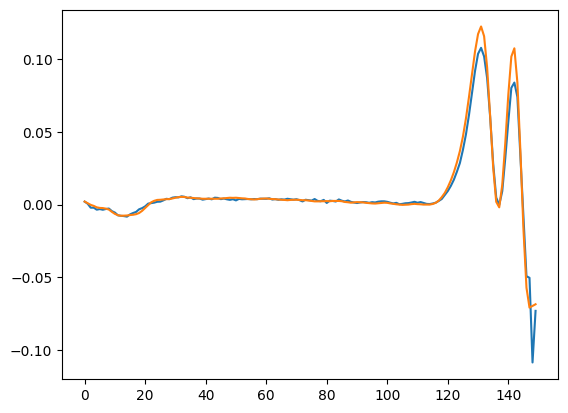

In [44]:
gen_data = generate_data(gen_BG, 10)
plt.plot(gen_data[4].T)
plt.plot(np.squeeze(test_data)[6].T)

In [45]:
generated_batch = generate_data(generator, num_synthetic_to_gen=100)

In [ ]:
def save_data_to_csv(data, filepath):
    df = pd.DataFrame(data)
    df.to_csv(filepath)

In [ ]:
save_data_to_csv(generated_batch, '../reports/samples100.csv')

In [48]:
data_syn = pd.read_csv("../reports/samples100.csv")

In [49]:
data_synn = data_syn.iloc[:,1:]
data_synn.head(3)

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.000998,0.000109,-0.001400,-0.002290,-0.002551,-0.002390,-0.002703,-0.002819,-0.003521,-0.005026,...,0.042316,0.056201,0.063246,0.055462,0.037955,0.017404,0.007575,0.002080,0.002096,0.004135
1,-0.000182,-0.000254,-0.000365,-0.000585,-0.000579,-0.001235,-0.001328,-0.002038,-0.003002,-0.004217,...,0.060909,0.081050,0.088764,0.078447,0.053068,0.029070,0.013351,0.009629,0.011755,0.013734
2,0.001970,0.001406,0.000130,0.000142,-0.000560,-0.001936,-0.003007,-0.002970,-0.003731,-0.005414,...,0.071806,0.095138,0.099191,0.078327,0.033277,-0.012502,-0.045049,-0.062435,-0.088483,-0.079823


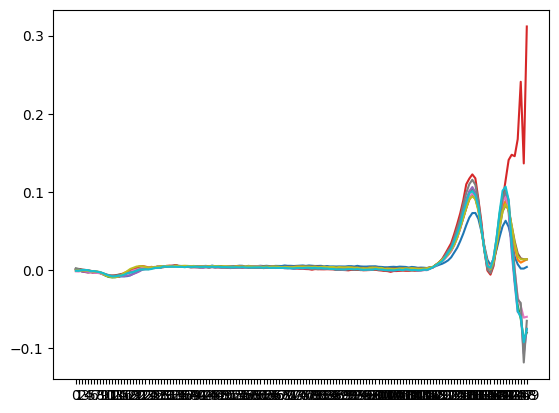

In [51]:
plt.plot(data_synn.head(10).T)